<a href="https://colab.research.google.com/github/chicks2014/Predict_affairs/blob/main/ExtraMaritalAffairs__logReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics 
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [ ]:
df = sm.datasets.fair.load_pandas().data

In [ ]:
df.sample(10)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
4509,5.0,27.0,6.0,0.0,2.0,17.0,4.0,6.0,0.000000
5463,5.0,27.0,16.5,1.0,2.0,14.0,3.0,2.0,0.000000
1776,1.0,42.0,23.0,3.0,1.0,17.0,4.0,5.0,1.826086
6309,5.0,37.0,23.0,2.0,3.0,20.0,4.0,4.0,0.000000
1106,4.0,17.5,2.5,0.0,2.0,12.0,2.0,5.0,4.799999
2101,5.0,17.5,0.5,0.0,2.0,14.0,4.0,5.0,0.000000
528,4.0,32.0,13.0,3.0,2.0,12.0,3.0,5.0,0.269231
6141,4.0,32.0,13.0,3.0,2.0,12.0,2.0,2.0,0.000000
5169,5.0,17.5,2.5,0.0,4.0,14.0,2.0,2.0,0.000000
4106,4.0,22.0,0.5,0.0,3.0,16.0,3.0,4.0,0.000000


In [ ]:
df.yrs_married.unique()

array([ 9. , 13. ,  2.5, 16.5, 23. ,  6. ,  0.5])

# **EDA**

In [ ]:
df.shape

(6366, 9)

In [ ]:
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
dtypes: float64(9)
memory usage: 447.7 KB


In [ ]:
df['affair'] = (df.affairs >0).astype(int)

In [ ]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


**Feature selection**

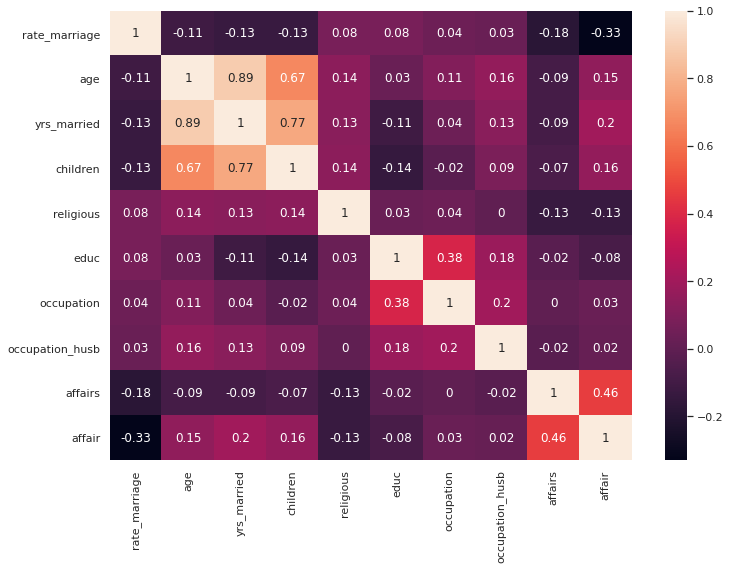

In [ ]:
cor = df.corr().round(2)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(cor,annot=True)

**Observation**


*   There are **high positive correlation** in below pairs of features
*   **age** and **yrs_married**
*   **yrs_married** and **children**



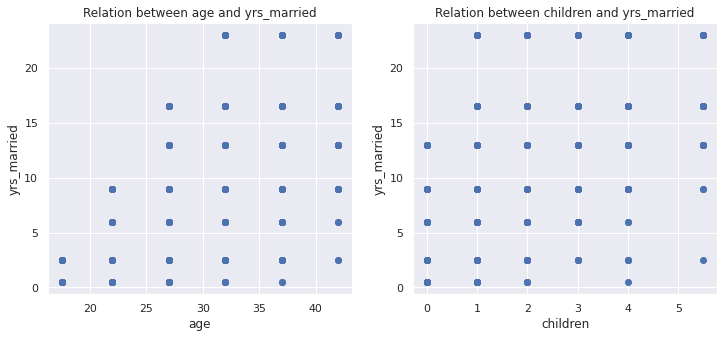

In [ ]:
plt.figure(figsize=(12,5))
features = [['age','yrs_married'],['children','yrs_married']]
for i, col in enumerate(features):
  plt.subplot(1, len(features),i+1)
  x = df[col[0]]
  y = df[col[1]]
  plt.scatter(x=x, y=y, marker='o')
  plt.title('Relation between {} and {}'.format(col[0],col[1]))
  plt.xlabel(col[0])
  plt.ylabel(col[1])
plt.show()

In [ ]:
# drop correlated features
df.drop(columns=['age','children'], inplace=True)

# shape of dataframe
df.shape

(6366, 8)

In [ ]:
df.head()

,rate_marriage,yrs_married,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,9.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,13.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,2.5,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,16.5,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,9.0,1.0,14.0,3.0,4.0,4.666666,1


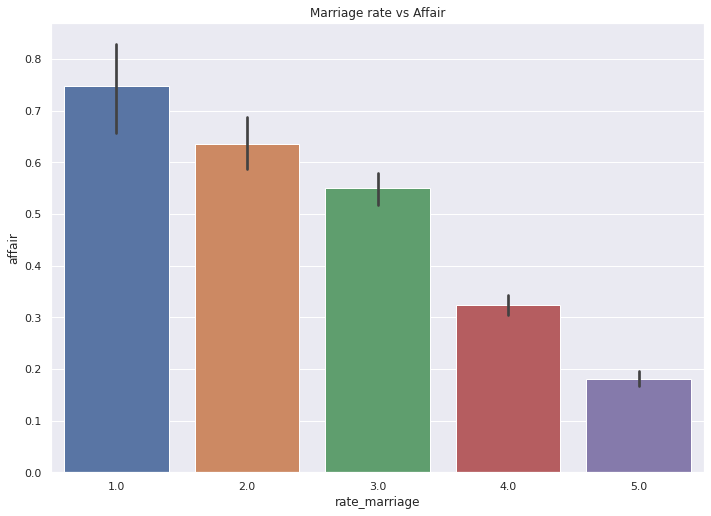

In [ ]:
# Density plot of price
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x= df['rate_marriage'],  y=df['affair'])
plt.title('Marriage rate vs Affair')
plt.show()

# **Model Development**

In [ ]:
y, X = dmatrices('affair ~ rate_marriage + yrs_married +  religious + educ + C(occupation) + C(occupation_husb)', df, return_type="dataframe")
X = X.rename(columns = 
{'C(occupation)[T.2.0]':'occ_2',

'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

y = np.ravel(y)

In [ ]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [ ]:
# drop unused column
X = X.drop(columns=['Intercept'])

In [ ]:
X

,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,yrs_married,religious,educ
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,9.0,3.0,17.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,13.0,1.0,14.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2.5,1.0,16.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,16.5,3.0,16.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,9.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,13.0,3.0,17.0
6362,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,13.0,1.0,16.0
6363,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.5,2.0,14.0
6364,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,6.0,3.0,14.0


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size= 0.25, random_state = 355)

In [ ]:
print('-'*30,' Shape of train and test dataset ','-'*30)
print('X train : {}, y train: {}'.format(x_train.shape, y_train.shape))
print('X test : {}, y test: {}'.format(x_test.shape, y_test.shape))
print('-'*100)

------------------------------  Shape of train and test dataset  ------------------------------
X train : (4774, 14), y train: (4774,)
X test : (1592, 14), y test: (1592,)
----------------------------------------------------------------------------------------------------


In [ ]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = log_reg.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.714824120603015

In [ ]:
cf_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred)
cf_matrix

array([[970, 114],
       [340, 168]])

Text(0.5, 1.0, 'Confusion matrix')

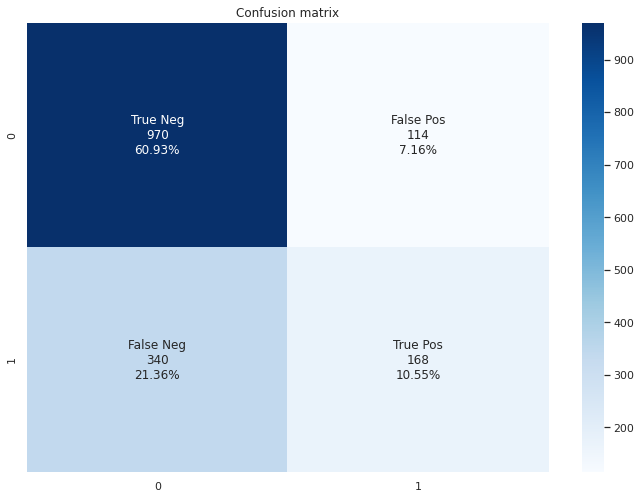

In [ ]:
# plot confusion matrix

# labels
group_names = ['True Neg','False Pos','False Neg','True Pos']
# counts
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
# percentages
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

plt.title('Confusion matrix')

In [ ]:
tn = cf_matrix[0][0]
fp = cf_matrix[0][1]
fn = cf_matrix[1][0]
tp = cf_matrix[1][1]

In [ ]:
# accuracy
accuracy = (tp + tn) / (tp+tn+fp+fn)
accuracy

0.714824120603015

In [ ]:
# precision
precision = tp / (tp+fp)
precision

0.5957446808510638

In [ ]:
# recall
recall = tp/(tp+fn)
recall

0.33070866141732286

In [ ]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.6127713048784031

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

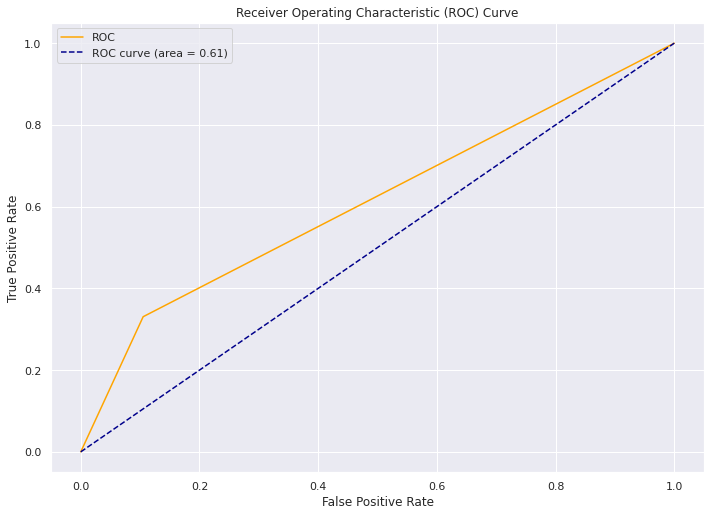

In [ ]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
filename = 'woman_affair_model.pickle'
pickle.dump(log_reg, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))